# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

The chromedriver version (125.0.6422.141) detected in PATH at C:\Users\avaan\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe might not be compatible with the detected chrome version (126.0.6478.127); currently, chromedriver 126.0.6478.126 is recommended for chrome 126.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [6]:
# Extract all rows of data
table = soup.find('table', class_='table')

In [7]:
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
data_rows = table.find_all('tr') [1:]
#tutouring

In [9]:
data_rows [0].find_all('td')

[<td>2</td>,
 <td>2012-08-16</td>,
 <td>10</td>,
 <td>155</td>,
 <td>6</td>,
 <td>-75.0</td>,
 <td>739.0</td>]

In [10]:
a=[1,2,3,4,5,]
a[:1]

[1]

In [11]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
rows = table.find_all('tr')

# Loop through the rows
for data_row in data_rows:
    row_data = [td.text for td in data_row.find_all('td')]
    data.append(row_data)
    

In [12]:
(data)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [13]:
print(data_row)

<tr class="data-row">
<td>1895</td>
<td>2018-02-27</td>
<td>1977</td>
<td>135</td>
<td>5</td>
<td>-77.0</td>
<td>727.0</td>
</tr>


In [14]:
[td.text for td in data_rows [0].find_all('td')]

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']

In [15]:
row_data

['1895', '2018-02-27', '1977', '135', '5', '-77.0', '727.0']

In [16]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Define the column names for your DataFrame
column_names = ['id', 'terrestrial_data', 'sol', 'Is', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame from the list of rows and column names
df = pd.DataFrame(data, columns=column_names)
# Confirm DataFrame was created successfully
# Display the DataFrame
df.head()

,id,terrestrial_data,sol,Is,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_data    object
sol                 object
Is                  object
month               object
min_temp            object
pressure            object
dtype: object

In [18]:
dft = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})

In [19]:
dft.dtypes

a    int64
b    int64
c    int64
dtype: object

In [20]:
dft[["a", "b"]]

,a,b
0,1,4
1,2,5
2,3,6


In [21]:
import numpy as np

In [22]:
df[['id','sol', 'Is', 'month']] = df[['id','sol', 'Is', 'month']].astype(int)

In [23]:
df.dtypes

id                   int32
terrestrial_data    object
sol                  int32
Is                   int32
month                int32
min_temp            object
pressure            object
dtype: object

In [24]:
# Change data types for data analysis
df[['min_temp', 'pressure']] = df[['min_temp', 'pressure']].astype(float)


In [25]:
df.dtypes

id                    int32
terrestrial_data     object
sol                   int32
Is                    int32
month                 int32
min_temp            float64
pressure            float64
dtype: object

In [26]:
df. terrestrial_data

0       2012-08-16
1       2012-08-17
2       2012-08-18
3       2012-08-19
4       2012-08-20
           ...    
1862    2018-02-23
1863    2018-02-24
1864    2018-02-25
1865    2018-02-26
1866    2018-02-27
Name: terrestrial_data, Length: 1867, dtype: object

In [27]:
pd.to_datetime(df. terrestrial_data) 

0      2012-08-16
1      2012-08-17
2      2012-08-18
3      2012-08-19
4      2012-08-20
          ...    
1862   2018-02-23
1863   2018-02-24
1864   2018-02-25
1865   2018-02-26
1866   2018-02-27
Name: terrestrial_data, Length: 1867, dtype: datetime64[ns]

In [28]:
df['terrestrial_data'] = pd.to_datetime(df. terrestrial_data) 

In [29]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_data    datetime64[ns]
sol                          int32
Is                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [30]:
# 1. How many months are there on Mars?
df.month.value_counts()


month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: count, dtype: int64

In [31]:
# 2. How many Martian days' worth of data are there?
df.sol.index[-1]+1

1867

In [32]:
df

,id,terrestrial_data,sol,Is,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [33]:
# 3. What is the average low temperature by month?
df.groupby(["month"]).mean().min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [34]:
# Plot the average temperature by month
temp = df.groupby(["month"]).mean().min_temp

<Axes: xlabel='month'>

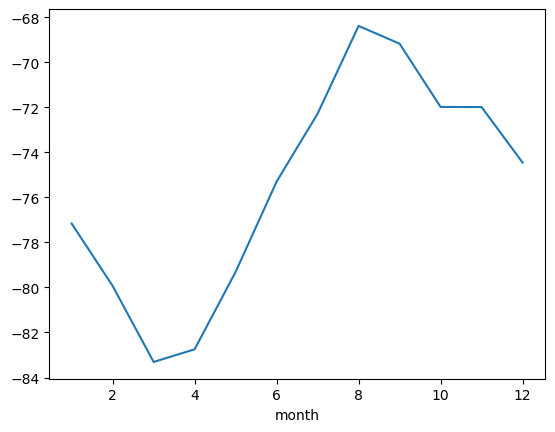

In [35]:
temp.plot()

In [36]:
# Identify the coldest and hottest months in Curiosity's location
#answer:
#coldest 3, #hottest 8

In [37]:
# 4. Average pressure by Martian month
df.groupby(["month"]).mean().pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [38]:
# Plot the average pressure by month
press = df.groupby(["month"]).mean().pressure

<Axes: xlabel='month'>

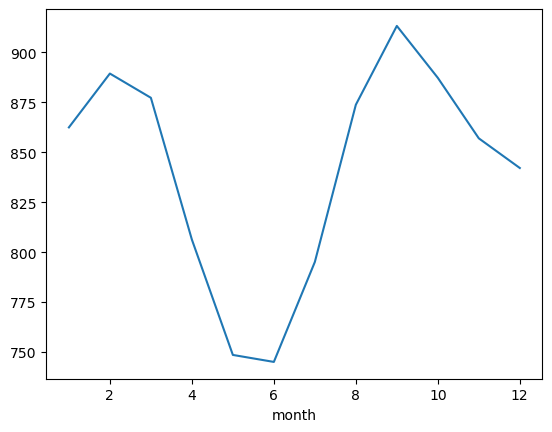

In [39]:
# Plot the average pressure by month
press.plot()

<Axes: >

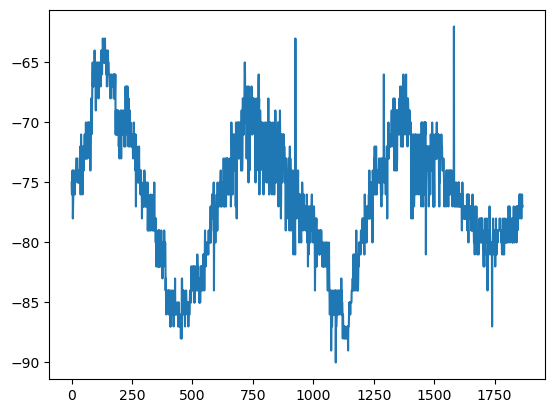

In [40]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df.min_temp.plot()
#Answer
#650 earth days is one Mars years

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
df.to_csv("mars.csv")

In [42]:
browser.quit()